In [1]:
npm install

SyntaxError: invalid syntax (2136566051.py, line 1)

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce 
import seaborn as sns
import statistics

In [2]:
data = pd.read_csv("train.csv", low_memory=False)

In [3]:
data['LiquidRatePot_m3_d']

0        200.887102
1        222.101207
2        222.101207
3        222.101207
4        222.101207
            ...    
22227     30.249588
22228     30.249588
22229     30.249588
22230     30.249588
22231     30.249588
Name: LiquidRatePot_m3_d, Length: 22232, dtype: float64

In [4]:
data.head(129)

,SK_Well,SK_Calendar,SK_Mounts,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,...,LP4_Share_LiquidRateMER_m3_d,LP5_SK_Layer,LP5_LiquidRateMER_m3_d,LP5_Share_LiquidRateMER_m3_d,Deflection,CurvRP,MaxCurvRP,FailureDate,daysToFailure,daysFromLastStart
0,00a28f99,2017-11-20,9017584.0,200.0,450.0,39.0,0.570000,H2-ПС-ЭЦН--2А-200-------,Неизвестно,Пакетный,...,NaN,NaN,NaN,NaN,0.0,0.094329,2.481547,2018-10-24,338,1
1,00a28f99,2017-11-21,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,337,2
2,00a28f99,2017-11-22,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,336,3
3,00a28f99,2017-11-23,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,335,4
4,00a28f99,2017-11-24,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,334,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,00a28f99,2018-03-24,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,214,125
125,00a28f99,2018-03-25,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,213,126
126,00a28f99,2018-03-26,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,212,127
127,00a28f99,2018-03-27,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,211,128


Поскольку начальная разметка данных выполненная мной до неверна пишем новую

In [5]:
data['Failure'] = data['daysToFailure'].apply(lambda x: 1 if x == 1 else 0)
data.update(data['Failure'])
data = data.astype({'Failure': 'Int64'})

Проверка

In [6]:
data.head(340)

,SK_Well,SK_Calendar,SK_Mounts,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,...,LP5_SK_Layer,LP5_LiquidRateMER_m3_d,LP5_Share_LiquidRateMER_m3_d,Deflection,CurvRP,MaxCurvRP,FailureDate,daysToFailure,daysFromLastStart,Failure
0,00a28f99,2017-11-20,9017584.0,200.0,450.0,39.0,0.570000,H2-ПС-ЭЦН--2А-200-------,Неизвестно,Пакетный,...,NaN,NaN,NaN,0.0,0.094329,2.481547,2018-10-24,338,1,0
1,00a28f99,2017-11-21,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,337,2,0
2,00a28f99,2017-11-22,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,336,3,0
3,00a28f99,2017-11-23,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,335,4,0
4,00a28f99,2017-11-24,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,334,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,00a28f99,2018-10-21,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,3,336,0
336,00a28f99,2018-10-22,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,2,337,0
337,00a28f99,2018-10-23,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,1,338,1
338,00a28f99,2018-10-25,9026842.0,160.0,834.0,146.0,0.567058,H2-ЛЧ-ЭЦН--5А-160-------,Неизвестно,Плавающий,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2019-05-07,194,340,0


Далее переводим даты в datetime, а object в диапозон значений от 0 до 1, а bool в 0 и 1

In [7]:
data['SK_Calendar'] = pd.to_datetime(data['SK_Calendar'])
data['FailureDate'] = pd.to_datetime(data['FailureDate'])
data['isHorizontal']=data['isHorizontal'].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Columns: 827 entries, SK_Well to Failure
dtypes: Int64(1), datetime64[ns](2), float64(528), int64(22), object(274)
memory usage: 140.3+ MB


Причина по которой категориальные переменные преобразуются в диапозон:

In [8]:
# Цикл перебирает каждую колонку в датасете data
for column in data.columns:
    # Проверяем, является ли тип данных колонки объектным
    if data[column].dtype == 'object':
        # Считаем количество уникальных значений в колонке
        unique_values = data[column].nunique()
        # Выводим название колонки и количество уникальных значений
        print(f"Колонка {column} имеет {unique_values} уникальных значений")

Колонка SK_Well имеет 93 уникальных значений
Колонка ESP1_ETT имеет 70 уникальных значений
Колонка ESP1_Manufacturer имеет 12 уникальных значений
Колонка ESP1_Build_type имеет 4 уникальных значений
Колонка ESP1_EquipPropName имеет 4 уникальных значений
Колонка ESP1_Overall_group имеет 9 уникальных значений
Колонка ESP1_Mark имеет 92 уникальных значений
Колонка ESP1_Subgroup имеет 6 уникальных значений
Колонка ESP2_ETT имеет 71 уникальных значений
Колонка ESP2_Manufacturer имеет 12 уникальных значений
Колонка ESP2_Build_type имеет 4 уникальных значений
Колонка ESP2_EquipPropName имеет 4 уникальных значений
Колонка ESP2_Overall_group имеет 9 уникальных значений
Колонка ESP2_Mark имеет 94 уникальных значений
Колонка ESP2_Subgroup имеет 6 уникальных значений
Колонка ESP3_ETT имеет 49 уникальных значений
Колонка ESP3_Manufacturer имеет 10 уникальных значений
Колонка ESP3_Build_type имеет 4 уникальных значений
Колонка ESP3_EquipPropName имеет 4 уникальных значений
Колонка ESP3_Overall_group 

In [9]:
data['Failure']

0        0
1        0
2        0
3        0
4        0
        ..
22227    0
22228    0
22229    0
22230    0
22231    1
Name: Failure, Length: 22232, dtype: Int64

In [10]:
X=data.drop(['Failure'],axis=1)
y=data['Failure']

Кодируем objectы

In [11]:
from category_encoders import TargetEncoder

# Создание объекта TargetEncoder
target_enc = TargetEncoder(cols=X.select_dtypes('object').columns, handle_unknown='value')

# Подгонка (fit) и применение трансформации (transform) к данным
X_encoded = target_enc.fit_transform(X, y)

# Отображение преобразованных данных
X_encoded.head()

,SK_Well,SK_Calendar,SK_Mounts,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,...,LP4_Share_LiquidRateMER_m3_d,LP5_SK_Layer,LP5_LiquidRateMER_m3_d,LP5_Share_LiquidRateMER_m3_d,Deflection,CurvRP,MaxCurvRP,FailureDate,daysToFailure,daysFromLastStart
0,0.002841,2017-11-20,9017584.0,200.0,450.0,39.0,0.570000,0.010414,0.00271,0.00521,...,NaN,NaN,NaN,NaN,0.0,0.094329,2.481547,2018-10-24,338,1
1,0.002841,2017-11-21,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,337,2
2,0.002841,2017-11-22,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,336,3
3,0.002841,2017-11-23,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,335,4
4,0.002841,2017-11-24,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,334,5


In [12]:
X_encoded['Motor1_Manufacturer'].nunique()

12

In [13]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Columns: 826 entries, SK_Well to daysFromLastStart
dtypes: Float64(274), datetime64[ns](2), float64(528), int64(22)
memory usage: 145.9 MB


Эта хрень работает, збс

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Failure, dtype: Int64

In [15]:
data_encoded = X_encoded.join(y)

In [16]:
data_encoded .to_csv("updated_train.csv", index=False)

ЗДЕСЬ ГРАНИЦА ШИЗЫ, типо шейкер фиссуру дал, понял да?

In [17]:
data = pd.read_csv("updated_train.csv", low_memory=False)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Columns: 827 entries, SK_Well to Failure
dtypes: float64(802), int64(23), object(2)
memory usage: 140.3+ MB


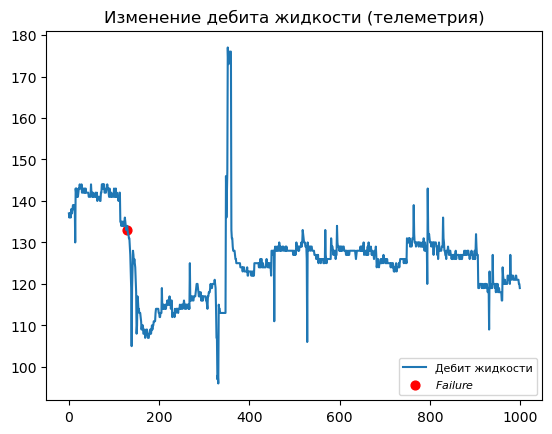

In [19]:
plt.plot(data['MeasureMRM12'][0:1000], label='Дебит жидкости')
plt.scatter(128, data['MeasureMRM12'][128],c='red', s=40, label='$Failure$')
plt.title('Изменение дебита жидкости (телеметрия)')
plt.legend(loc='lower right', fontsize='8')
# plt.savefig('Q telemetry.jpg', dpi=500)

In [20]:
from scipy.stats import boxcox

In [21]:
series = data['MeasureMRM204']

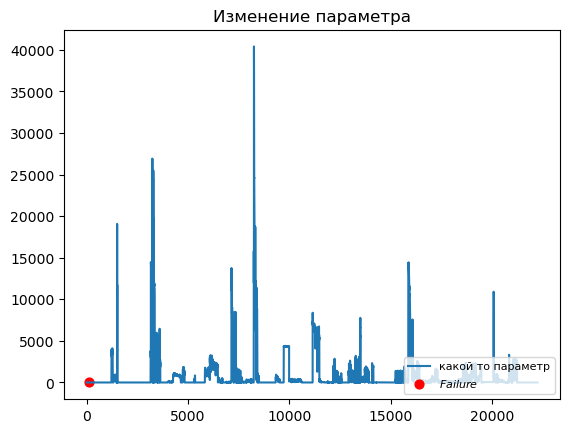

In [22]:
plt.plot(series, label='какой то параметр')
plt.scatter(128, series[128],c='red', s=40, label='$Failure$')
plt.title('Изменение параметра')
plt.legend(loc='lower right', fontsize='8')
# plt.savefig('Q geo.jpg', dpi=500)

In [23]:
data.head()

,SK_Well,SK_Calendar,SK_Mounts,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,...,LP5_SK_Layer,LP5_LiquidRateMER_m3_d,LP5_Share_LiquidRateMER_m3_d,Deflection,CurvRP,MaxCurvRP,FailureDate,daysToFailure,daysFromLastStart,Failure
0,0.002841,2017-11-20,9017584.0,200.0,450.0,39.0,0.570000,0.010414,0.00271,0.005210,...,NaN,NaN,NaN,0.0,0.094329,2.481547,2018-10-24,338,1,0
1,0.002841,2017-11-21,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,337,2,0
2,0.002841,2017-11-22,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,336,3,0
3,0.002841,2017-11-23,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,335,4,0
4,0.002841,2017-11-24,9026842.0,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,...,NaN,NaN,NaN,1.0,0.214381,2.316212,2018-10-24,334,5,0


In [24]:
df=data.drop(['CurrentTTF','SK_Calendar','SK_Mounts','FailureDate','daysToFailure','daysFromLastStart','FailuresCountFromLastWellWork','SK_ConfirmDateStart','sk_calendarprevmonth','lastStartDate','SK_Well'],axis=1)

In [25]:
frame=data[['DynamicLevel_m',
'WellHeadPressure_atm',
'CasingPressure_atm',
'FlowlinePressure_atm',
'Watercut_t',
'Motor1_NominalFrequency',
'PumpIntakePressure_atm',
'LiquidRate_t_d',
'OilRate_t_d',
'MeasureMRM219',
'MeasureMRM144',
'MeasureMRM12',
'MeasureMRM30',
'MeasureMRM33',
'MeasureMRM204',
'MeasureMRM205',
'MeasureMRM184',
'MeasureMRM141',
'MeasureMRM142',
'MeasureMRM205',
'MeasureMRM188',
'OilDensity_t_m3',
'OilViscosity_cps',]]


In [26]:
missing_values_count = frame.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
DynamicLevel_m: 0
WellHeadPressure_atm: 0
CasingPressure_atm: 0
FlowlinePressure_atm: 0
Watercut_t: 0
Motor1_NominalFrequency: 0
PumpIntakePressure_atm: 0
LiquidRate_t_d: 0
OilRate_t_d: 0
MeasureMRM219: 0
MeasureMRM144: 5729
MeasureMRM12: 0
MeasureMRM30: 0
MeasureMRM33: 0
MeasureMRM204: 0
MeasureMRM205: 0
MeasureMRM184: 0
MeasureMRM141: 0
MeasureMRM142: 0
MeasureMRM205: 0
MeasureMRM188: 0
OilDensity_t_m3: 0
OilViscosity_cps: 0


In [27]:
missing_values_count = df.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
ESP1_Feeding_m3_day: 213
ESP1_Pressure_m: 213
ESP1_StageCount: 213
ESP1_MaxEfficiency: 213
ESP1_ETT: 0
ESP1_Manufacturer: 0
ESP1_Build_type: 0
ESP1_EquipPropName: 0
ESP1_Overall_group: 0
ESP1_Diameter: 213
ESP1_Mark: 0
ESP1_Subgroup: 0
ESP1_ESPPositionNum: 213
ESP2_Feeding_m3_day: 2301
ESP2_Pressure_m: 2301
ESP2_StageCount: 2301
ESP2_MaxEfficiency: 2301
ESP2_ETT: 0
ESP2_Manufacturer: 0
ESP2_Build_type: 0
ESP2_EquipPropName: 0
ESP2_Overall_group: 0
ESP2_Diameter: 2301
ESP2_Mark: 0
ESP2_Subgroup: 0
ESP2_ESPPositionNum: 2301
ESP3_Feeding_m3_day: 11363
ESP3_Pressure_m: 11363
ESP3_StageCount: 11363
ESP3_MaxEfficiency: 11363
ESP3_ETT: 0
ESP3_Manufacturer: 0
ESP3_Build_type: 0
ESP3_EquipPropName: 0
ESP3_Overall_group: 0
ESP3_Diameter: 11363
ESP3_Mark: 0
ESP3_Subgroup: 0
ESP3_ESPPositionNum: 11363
ESP4_Feeding_m3_day: 16295
ESP4_Pressure_m: 16295
ESP4_StageCount: 16295
ESP4_MaxEfficiency: 16295
ESP4_ETT: 0
ESP4_Manufacturer: 0
ESP4_Build_type: 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Columns: 815 entries, ESP1_Feeding_m3_day to Failure
dtypes: float64(797), int64(18)
memory usage: 138.2 MB


In [29]:
df.shape

(22232, 815)

Проверка пропусков

In [30]:
df.shape[0] //2
df=df.dropna(thresh=df.shape[0] //2, axis=1)
df.shape

(22232, 433)

In [31]:
missing_values_count = df.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
ESP1_Feeding_m3_day: 213
ESP1_Pressure_m: 213
ESP1_StageCount: 213
ESP1_MaxEfficiency: 213
ESP1_ETT: 0
ESP1_Manufacturer: 0
ESP1_Build_type: 0
ESP1_EquipPropName: 0
ESP1_Overall_group: 0
ESP1_Diameter: 213
ESP1_Mark: 0
ESP1_Subgroup: 0
ESP1_ESPPositionNum: 213
ESP2_Feeding_m3_day: 2301
ESP2_Pressure_m: 2301
ESP2_StageCount: 2301
ESP2_MaxEfficiency: 2301
ESP2_ETT: 0
ESP2_Manufacturer: 0
ESP2_Build_type: 0
ESP2_EquipPropName: 0
ESP2_Overall_group: 0
ESP2_Diameter: 2301
ESP2_Mark: 0
ESP2_Subgroup: 0
ESP2_ESPPositionNum: 2301
ESP3_ETT: 0
ESP3_Manufacturer: 0
ESP3_Build_type: 0
ESP3_EquipPropName: 0
ESP3_Overall_group: 0
ESP3_Mark: 0
ESP3_Subgroup: 0
ESP4_ETT: 0
ESP4_Manufacturer: 0
ESP4_Build_type: 0
ESP4_EquipPropName: 0
ESP4_Overall_group: 0
ESP4_Mark: 0
ESP4_Subgroup: 0
ESP5_ETT: 0
ESP5_Manufacturer: 0
ESP5_Build_type: 0
ESP5_EquipPropName: 0
ESP5_Overall_group: 0
ESP5_Mark: 0
ESP5_Subgroup: 0
ESP6_ETT: 0
ESP6_Manufacturer: 0
ESP6_Build_

Половина данных отлитает из за наличия пропусков больше половины

Заполним пропуски методом ближних

In [32]:
df=df.interpolate(method='nearest')
df.info(500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Data columns (total 433 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    ESP1_Feeding_m3_day           float64
 1    ESP1_Pressure_m               float64
 2    ESP1_StageCount               float64
 3    ESP1_MaxEfficiency            float64
 4    ESP1_ETT                      float64
 5    ESP1_Manufacturer             float64
 6    ESP1_Build_type               float64
 7    ESP1_EquipPropName            float64
 8    ESP1_Overall_group            float64
 9    ESP1_Diameter                 float64
 10   ESP1_Mark                     float64
 11   ESP1_Subgroup                 float64
 12   ESP1_ESPPositionNum           float64
 13   ESP2_Feeding_m3_day           float64
 14   ESP2_Pressure_m               float64
 15   ESP2_StageCount               float64
 16   ESP2_MaxEfficiency            float64
 17   ESP2_ETT                      float64
 18   ESP2

In [33]:
missing_values_count = df.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
ESP1_Feeding_m3_day: 0
ESP1_Pressure_m: 0
ESP1_StageCount: 0
ESP1_MaxEfficiency: 0
ESP1_ETT: 0
ESP1_Manufacturer: 0
ESP1_Build_type: 0
ESP1_EquipPropName: 0
ESP1_Overall_group: 0
ESP1_Diameter: 0
ESP1_Mark: 0
ESP1_Subgroup: 0
ESP1_ESPPositionNum: 0
ESP2_Feeding_m3_day: 0
ESP2_Pressure_m: 0
ESP2_StageCount: 0
ESP2_MaxEfficiency: 0
ESP2_ETT: 0
ESP2_Manufacturer: 0
ESP2_Build_type: 0
ESP2_EquipPropName: 0
ESP2_Overall_group: 0
ESP2_Diameter: 0
ESP2_Mark: 0
ESP2_Subgroup: 0
ESP2_ESPPositionNum: 0
ESP3_ETT: 0
ESP3_Manufacturer: 0
ESP3_Build_type: 0
ESP3_EquipPropName: 0
ESP3_Overall_group: 0
ESP3_Mark: 0
ESP3_Subgroup: 0
ESP4_ETT: 0
ESP4_Manufacturer: 0
ESP4_Build_type: 0
ESP4_EquipPropName: 0
ESP4_Overall_group: 0
ESP4_Mark: 0
ESP4_Subgroup: 0
ESP5_ETT: 0
ESP5_Manufacturer: 0
ESP5_Build_type: 0
ESP5_EquipPropName: 0
ESP5_Overall_group: 0
ESP5_Mark: 0
ESP5_Subgroup: 0
ESP6_ETT: 0
ESP6_Manufacturer: 0
ESP6_Build_type: 0
ESP6_EquipPropName: 0


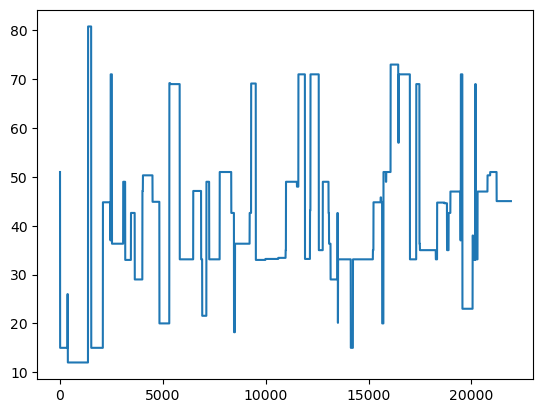

In [34]:
plt.plot(df['GapInnerMotor_mm'])

In [35]:
df=df.fillna(0)

In [36]:
df

,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,ESP1_EquipPropName,ESP1_Overall_group,ESP1_Diameter,...,LiquidRate_300_500,LiquidRate_500_1000,LiquidRate_1000,LP1_SK_Layer,LP1_LiquidRateMER_m3_d,LP1_Share_LiquidRateMER_m3_d,Deflection,CurvRP,MaxCurvRP,Failure
0,200.0,450.0,39.0,0.570000,0.010414,0.002710,0.005210,0.003944,0.004859,0.069,...,0,0,0,90513.0,130.118667,1.0,0.0,0.094329,2.481547,0
1,160.0,834.0,146.0,0.567058,0.002639,0.002710,0.004114,0.003944,0.003587,0.103,...,0,0,0,90513.0,137.359839,1.0,1.0,0.214381,2.316212,0
2,160.0,834.0,146.0,0.567058,0.002639,0.002710,0.004114,0.003944,0.003587,0.103,...,0,0,0,90513.0,137.359839,1.0,1.0,0.214381,2.316212,0
3,160.0,834.0,146.0,0.567058,0.002639,0.002710,0.004114,0.003944,0.003587,0.103,...,0,0,0,90513.0,137.359839,1.0,1.0,0.214381,2.316212,0
4,160.0,834.0,146.0,0.567058,0.002639,0.002710,0.004114,0.003944,0.003587,0.103,...,0,0,0,90513.0,137.359839,1.0,1.0,0.214381,2.316212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22227,50.0,530.0,104.0,0.478000,0.004266,0.005172,0.005210,0.005932,0.004859,0.069,...,0,0,0,90287.0,23.582450,1.0,4.0,0.421037,2.852451,0
22228,50.0,530.0,104.0,0.478000,0.004266,0.005172,0.005210,0.005932,0.004859,0.069,...,0,0,0,90287.0,23.582450,1.0,4.0,0.421037,2.852451,0
22229,50.0,530.0,104.0,0.478000,0.004266,0.005172,0.005210,0.005932,0.004859,0.069,...,0,0,0,90287.0,23.582450,1.0,4.0,0.421037,2.852451,0
22230,50.0,530.0,104.0,0.478000,0.004266,0.005172,0.005210,0.005932,0.004859,0.069,...,0,0,0,90287.0,23.582450,1.0,4.0,0.421037,2.852451,0


In [37]:
X=df.drop(['Failure'],axis=1)
y=df['Failure']

In [38]:
from sklearn.feature_selection import f_classif,SelectKBest, chi2

In [39]:
X.describe()

,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,ESP1_EquipPropName,ESP1_Overall_group,ESP1_Diameter,...,LiquidRate_125_300,LiquidRate_300_500,LiquidRate_500_1000,LiquidRate_1000,LP1_SK_Layer,LP1_LiquidRateMER_m3_d,LP1_Share_LiquidRateMER_m3_d,Deflection,CurvRP,MaxCurvRP
count,22232.000000,22232.000000,22232.000000,22232.000000,2.223200e+04,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,...,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000
mean,175.564367,823.363800,121.019656,0.538984,4.298969e-03,0.004501,0.004493,0.004496,0.004480,0.091331,...,0.200927,0.046734,0.053706,0.021725,90204.952321,140.613486,0.956656,7.972157,0.379272,2.378003
std,237.724781,492.962135,38.727007,0.074628,4.145535e-03,0.001693,0.000926,0.001732,0.000991,0.011786,...,0.400702,0.211074,0.225442,0.145789,117.763939,222.835409,0.157951,23.487377,0.470397,0.847576
min,30.000000,165.000000,39.000000,0.311691,1.241798e-08,0.002151,0.004114,0.003944,0.000449,0.069000,...,0.000000,0.000000,0.000000,0.000000,90105.000000,0.435043,0.007000,0.000000,0.000000,0.921238
25%,50.000000,520.000000,103.000000,0.478000,2.070393e-03,0.003413,0.004114,0.003944,0.003587,0.081000,...,0.000000,0.000000,0.000000,0.000000,90105.000000,23.646000,1.000000,1.000000,0.156911,1.690972
50%,80.000000,713.000000,118.000000,0.555000,3.194888e-03,0.004453,0.004114,0.003944,0.004680,0.092000,...,0.000000,0.000000,0.000000,0.000000,90152.000000,57.184581,1.000000,1.000000,0.201409,2.291845
75%,160.000000,922.000000,150.000000,0.580000,5.157056e-03,0.005172,0.005210,0.003944,0.004859,0.103000,...,0.000000,0.000000,0.000000,0.000000,90282.000000,145.684696,1.000000,4.000000,0.421037,2.897932
max,1250.000000,2205.000000,200.000000,0.720900,4.573784e-02,0.011486,0.023221,0.034350,0.027249,0.114000,...,1.000000,1.000000,1.000000,1.000000,90513.000000,1330.784161,1.000000,219.000000,3.165703,5.111046


In [40]:
missing_values_count = X.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
ESP1_Feeding_m3_day: 0
ESP1_Pressure_m: 0
ESP1_StageCount: 0
ESP1_MaxEfficiency: 0
ESP1_ETT: 0
ESP1_Manufacturer: 0
ESP1_Build_type: 0
ESP1_EquipPropName: 0
ESP1_Overall_group: 0
ESP1_Diameter: 0
ESP1_Mark: 0
ESP1_Subgroup: 0
ESP1_ESPPositionNum: 0
ESP2_Feeding_m3_day: 0
ESP2_Pressure_m: 0
ESP2_StageCount: 0
ESP2_MaxEfficiency: 0
ESP2_ETT: 0
ESP2_Manufacturer: 0
ESP2_Build_type: 0
ESP2_EquipPropName: 0
ESP2_Overall_group: 0
ESP2_Diameter: 0
ESP2_Mark: 0
ESP2_Subgroup: 0
ESP2_ESPPositionNum: 0
ESP3_ETT: 0
ESP3_Manufacturer: 0
ESP3_Build_type: 0
ESP3_EquipPropName: 0
ESP3_Overall_group: 0
ESP3_Mark: 0
ESP3_Subgroup: 0
ESP4_ETT: 0
ESP4_Manufacturer: 0
ESP4_Build_type: 0
ESP4_EquipPropName: 0
ESP4_Overall_group: 0
ESP4_Mark: 0
ESP4_Subgroup: 0
ESP5_ETT: 0
ESP5_Manufacturer: 0
ESP5_Build_type: 0
ESP5_EquipPropName: 0
ESP5_Overall_group: 0
ESP5_Mark: 0
ESP5_Subgroup: 0
ESP6_ETT: 0
ESP6_Manufacturer: 0
ESP6_Build_type: 0
ESP6_EquipPropName: 0


Нулей у X нет

In [41]:
import numpy as np

missing_values_count = np.isfinite(X).sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
ESP1_Feeding_m3_day: 22232
ESP1_Pressure_m: 22232
ESP1_StageCount: 22232
ESP1_MaxEfficiency: 22232
ESP1_ETT: 22232
ESP1_Manufacturer: 22232
ESP1_Build_type: 22232
ESP1_EquipPropName: 22232
ESP1_Overall_group: 22232
ESP1_Diameter: 22232
ESP1_Mark: 22232
ESP1_Subgroup: 22232
ESP1_ESPPositionNum: 22232
ESP2_Feeding_m3_day: 22232
ESP2_Pressure_m: 22232
ESP2_StageCount: 22232
ESP2_MaxEfficiency: 22232
ESP2_ETT: 22232
ESP2_Manufacturer: 22232
ESP2_Build_type: 22232
ESP2_EquipPropName: 22232
ESP2_Overall_group: 22232
ESP2_Diameter: 22232
ESP2_Mark: 22232
ESP2_Subgroup: 22232
ESP2_ESPPositionNum: 22232
ESP3_ETT: 22232
ESP3_Manufacturer: 22232
ESP3_Build_type: 22232
ESP3_EquipPropName: 22232
ESP3_Overall_group: 22232
ESP3_Mark: 22232
ESP3_Subgroup: 22232
ESP4_ETT: 22232
ESP4_Manufacturer: 22232
ESP4_Build_type: 22232
ESP4_EquipPropName: 22232
ESP4_Overall_group: 22232
ESP4_Mark: 22232
ESP4_Subgroup: 22232
ESP5_ETT: 22232
ESP5_Manufacturer: 22232

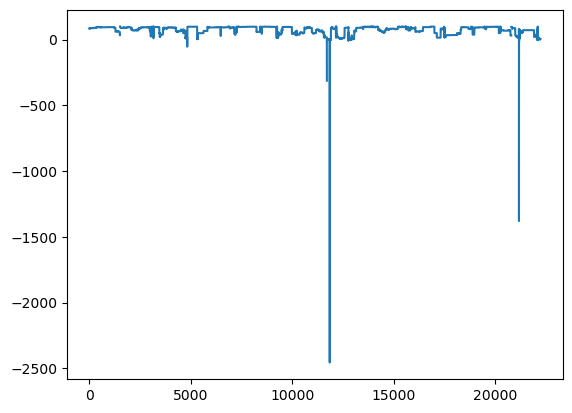

In [42]:
plt.plot(X['MeasureMRM33'])

In [43]:
X['MeasureMRM33'].mean()

-inf

In [44]:
X['MeasureMRM33'] = np.where((X['MeasureMRM33'] >= 0) & (X['MeasureMRM33'] <= 100), X['MeasureMRM33'], np.nan)

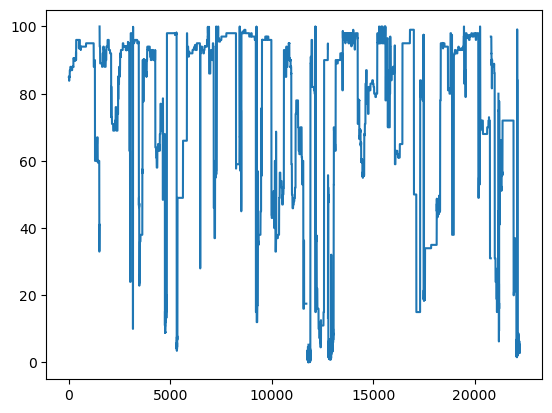

In [45]:
plt.plot(X['MeasureMRM33'])

In [46]:
X['MeasureMRM33'].interpolate('nearest')


0        85.021898
1        85.044118
2        84.970803
3        85.007299
4        84.955882
           ...    
22227     4.423077
22228     4.423077
22229     4.750000
22230     3.464286
22231     5.259259
Name: MeasureMRM33, Length: 22232, dtype: float64

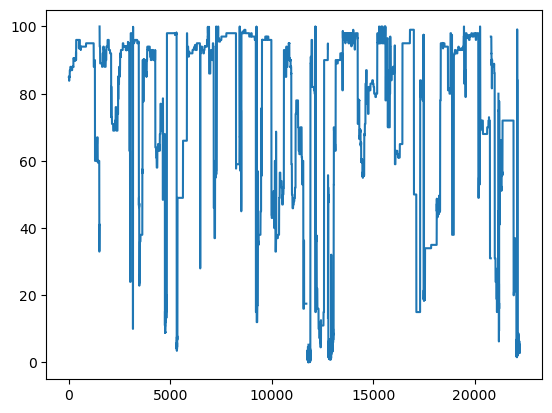

In [47]:
plt.plot(X['MeasureMRM33'])

In [48]:
np.isfinite(X['MeasureMRM33']).sum()

22145

In [49]:
X['MeasureMRM33']=X['MeasureMRM33'].fillna(X['MeasureMRM33'].mean())

In [50]:
np.isfinite(X['MeasureMRM33']).sum()

22232

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Columns: 432 entries, ESP1_Feeding_m3_day to MaxCurvRP
dtypes: float64(415), int64(17)
memory usage: 73.3 MB


Добавление признаков от ребят

In [52]:
features_team=X[['DynamicLevel_m',
'WellHeadPressure_atm',
'CasingPressure_atm',
'FlowlinePressure_atm',
'Watercut_t',
'Motor1_NominalFrequency',
'PumpIntakePressure_atm',
'LiquidRate_t_d',
'OilRate_t_d',
'MeasureMRM219',
'MeasureMRM12',
'MeasureMRM30',
'MeasureMRM33',
'MeasureMRM204',
'MeasureMRM184',
'MeasureMRM141',
'MeasureMRM142',
'MeasureMRM205',
'MeasureMRM188',
'OilDensity_t_m3',
'OilViscosity_cps',]]

In [53]:
telemetry=X[['MeasureMRM219',
'MeasureMRM12',
'MeasureMRM30',
'MeasureMRM33',
'MeasureMRM204',
'MeasureMRM184',
'MeasureMRM141',
'MeasureMRM142',
'MeasureMRM205',
'MeasureMRM188',]]

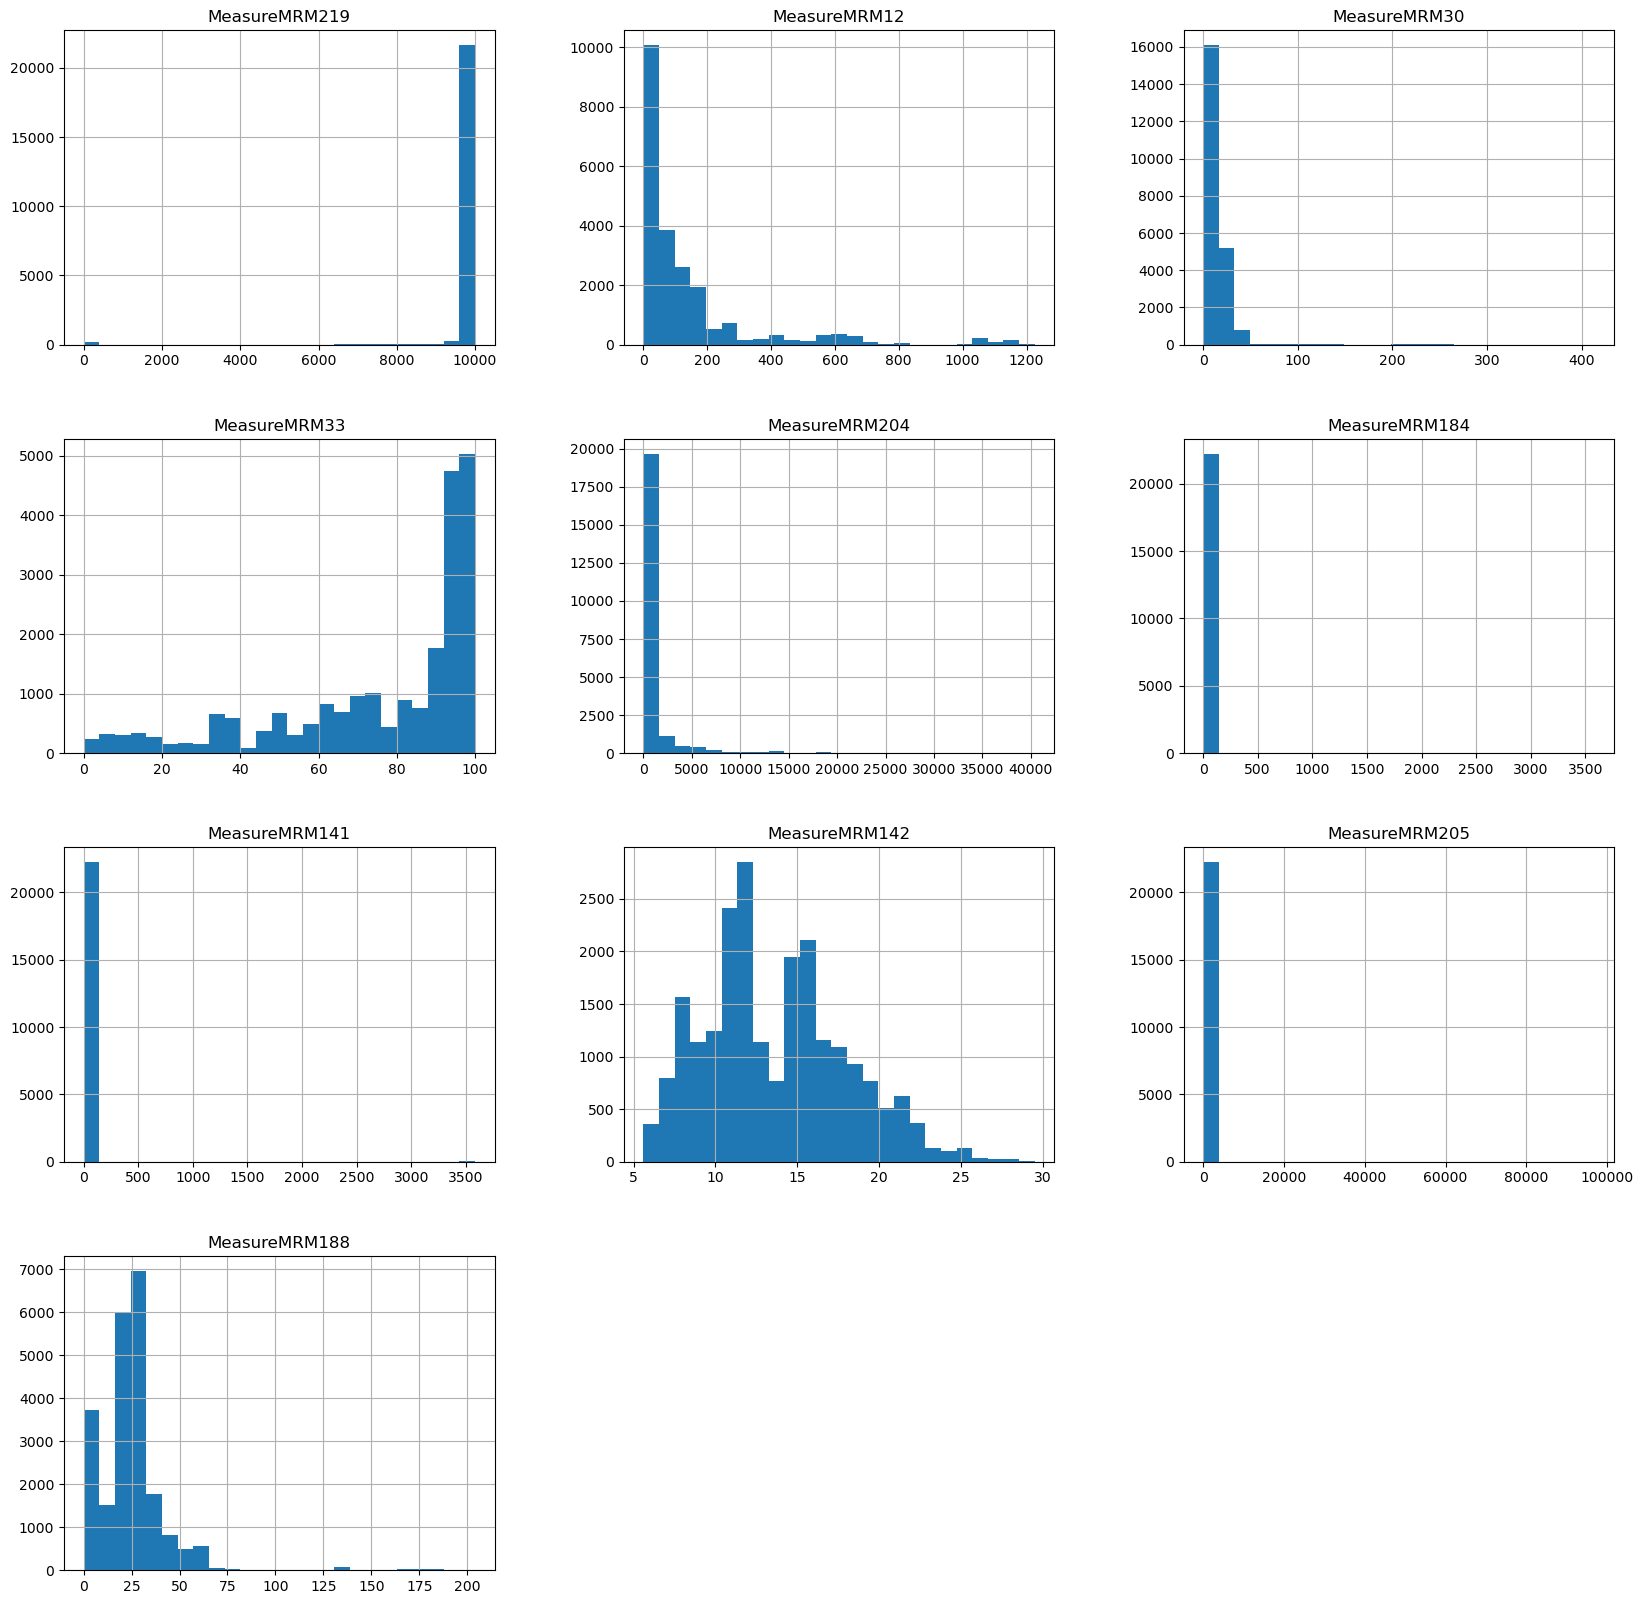

In [54]:
telemetry.hist(bins=25, figsize=(20,20));

[['MeasureMRM219',
'MeasureMRM12',
'MeasureMRM30',
'MeasureMRM33',
'MeasureMRM204',
'MeasureMRM184',
'MeasureMRM141',
'MeasureMRM142',
'MeasureMRM205',
'MeasureMRM188',]]

In [55]:
series= {
    'ЗамерыМРМ/Сопротивление изоляции (ТМ)': X['MeasureMRM219'],
    'ЗамерыМРМ/Дебит жидкости (ТМ)': X['MeasureMRM12'],
    'ЗамерыМРМ/Дебит нефти (ТМ)': X['MeasureMRM30'],
    'ЗамерыМРМ/Обводненность (ТМ)': X['MeasureMRM33'],
    'ЗамерыМРМ/Дебит газа (ТМ)': X['MeasureMRM204'],
    'ЗамерыМРМ/Давление буферное (ТМ)': X['MeasureMRM184'],
    'ЗамерыМРМ/Давление затрубное (ТМ)' : X['MeasureMRM141'],
    'ЗамерыМРМ/Давление линейное (ТМ)': X['MeasureMRM142'],
    'ЗамерыМРМ/Газовый фактор (ТМ)': X['MeasureMRM205'],
    'ЗамерыМРМ/Давление на приеме насоса (ТМ)': X['MeasureMRM188']
                                              

}

Переименуем measure на адекватную подпись

In [56]:
X = pd.concat([X.loc[:, ~X.columns.isin(series.keys())], pd.DataFrame(series)], axis=1)
X.head()

,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,ESP1_EquipPropName,ESP1_Overall_group,ESP1_Diameter,...,ЗамерыМРМ/Сопротивление изоляции (ТМ),ЗамерыМРМ/Дебит жидкости (ТМ),ЗамерыМРМ/Дебит нефти (ТМ),ЗамерыМРМ/Обводненность (ТМ),ЗамерыМРМ/Дебит газа (ТМ),ЗамерыМРМ/Давление буферное (ТМ),ЗамерыМРМ/Давление затрубное (ТМ),ЗамерыМРМ/Давление линейное (ТМ),ЗамерыМРМ/Газовый фактор (ТМ),ЗамерыМРМ/Давление на приеме насоса (ТМ)
0,200.0,450.0,39.0,0.570000,0.010414,0.00271,0.005210,0.003944,0.004859,0.069,...,7219.0,137.0,20.52,85.021898,0.0,10.0,10.0,7.3,0.0,25.5
1,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,7219.0,136.0,20.34,85.044118,0.0,10.0,10.0,7.3,0.0,25.0
2,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,6709.0,137.0,20.59,84.970803,0.0,10.0,10.0,7.5,0.0,24.8
3,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,6709.0,137.0,20.54,85.007299,0.0,10.0,10.0,7.4,0.0,24.8
4,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,6869.0,136.0,20.46,84.955882,0.0,10.0,10.0,7.3,0.0,24.8


In [57]:
def many_plot(series):
    layout = (5, 2)
    fig, axs = plt.subplots(layout[0], layout[1], figsize=(14, 10))

    for i, (key, value) in enumerate(series.items()):
        row = i // layout[1]
        col = i % layout[1]
        ax = axs[row, col]
        ax.set_title(key)
        sns.lineplot(data=value, ax=ax, color='blue')
        
        ax.set(xlabel='t, c')
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('Telemetry.png', dpi=500)
    plt.show()
    

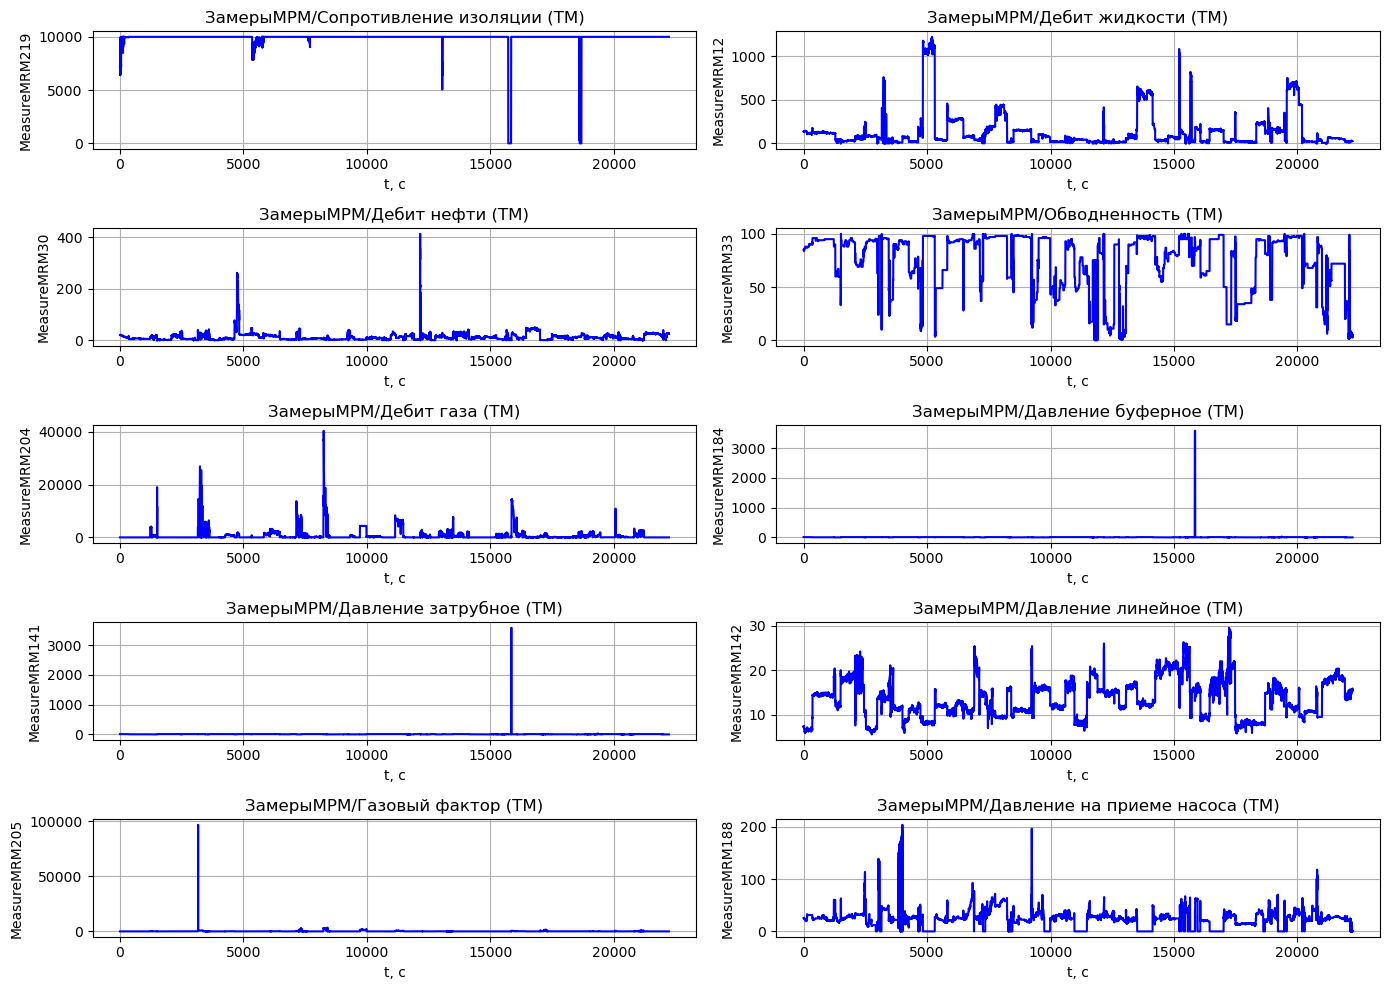

In [58]:
many_plot(series)

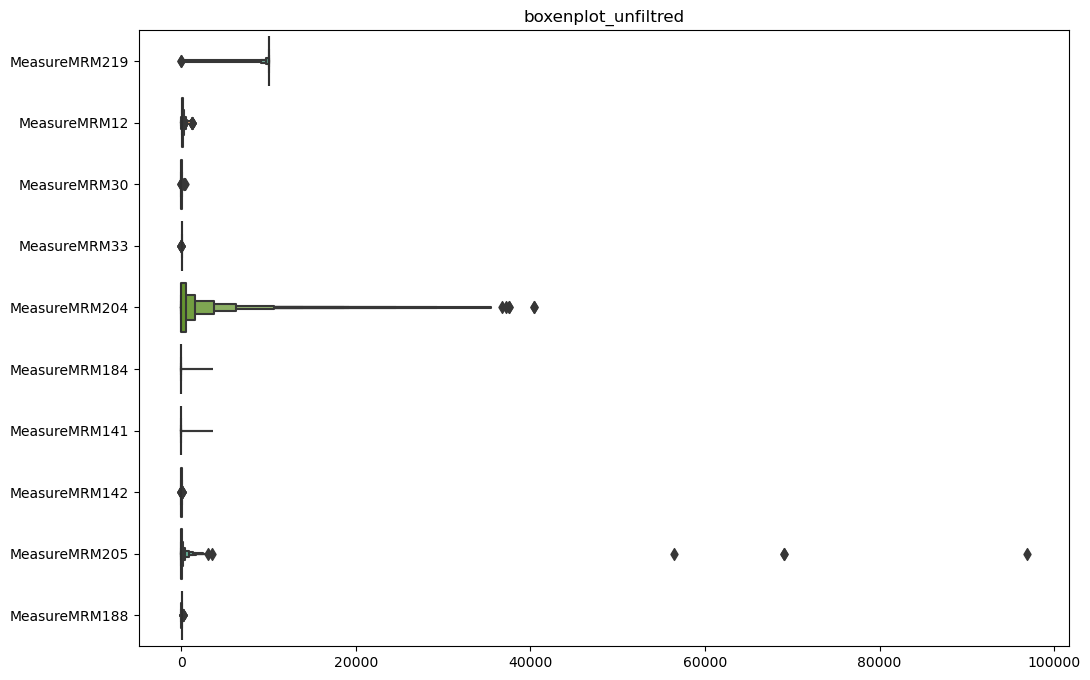

In [59]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=telemetry,palette='Dark2', orient='h')
plt.title('boxenplot_unfiltred')
plt.savefig('boxenplot_unfiltred.png', dpi=500)

Газовый фактор

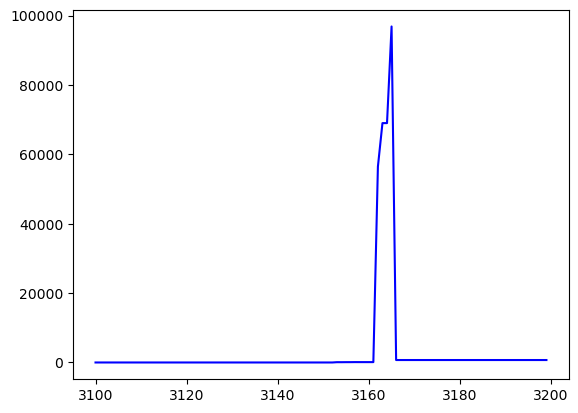

In [60]:
plt.plot(X['ЗамерыМРМ/Газовый фактор (ТМ)'][3100:3200], c='blue')

In [61]:
X['ЗамерыМРМ/Газовый фактор (ТМ)'].mean()

105.10904102195035

Удаляем данные с высоким размахом

Считаем пороговое значение

In [62]:
def remove_outliers_and_interpolate(column, threshold):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]
    interpolated_column = filtered_column.interpolate(method='nearest')
    return interpolated_column

threshold = 2.5  # Новое пороговое значение

for column_name, column_data in series.items():
    series[column_name] = remove_outliers_and_interpolate(column_data, threshold)

# Обновление датасета X
X = pd.concat([X.loc[:, ~X.columns.isin(series.keys())], pd.DataFrame(series)], axis=1)
X.head()

,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,ESP1_EquipPropName,ESP1_Overall_group,ESP1_Diameter,...,ЗамерыМРМ/Сопротивление изоляции (ТМ),ЗамерыМРМ/Дебит жидкости (ТМ),ЗамерыМРМ/Дебит нефти (ТМ),ЗамерыМРМ/Обводненность (ТМ),ЗамерыМРМ/Дебит газа (ТМ),ЗамерыМРМ/Давление буферное (ТМ),ЗамерыМРМ/Давление затрубное (ТМ),ЗамерыМРМ/Давление линейное (ТМ),ЗамерыМРМ/Газовый фактор (ТМ),ЗамерыМРМ/Давление на приеме насоса (ТМ)
0,200.0,450.0,39.0,0.570000,0.010414,0.00271,0.005210,0.003944,0.004859,0.069,...,NaN,137.0,20.52,85.021898,0.0,10.0,10.0,7.3,0.0,25.5
1,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,NaN,136.0,20.34,85.044118,0.0,10.0,10.0,7.3,0.0,25.0
2,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,NaN,137.0,20.59,84.970803,0.0,10.0,10.0,7.5,0.0,24.8
3,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,NaN,137.0,20.54,85.007299,0.0,10.0,10.0,7.4,0.0,24.8
4,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,NaN,136.0,20.46,84.955882,0.0,10.0,10.0,7.3,0.0,24.8


In [63]:
threshold

2.5

In [64]:
for column_name, column_data in series.items():
    median_value = column_data.median()
    series[column_name] = column_data.fillna(median_value)
X = pd.concat([X.loc[:, ~X.columns.isin(series.keys())], pd.DataFrame(series)], axis=1)

In [65]:
missing_values_count = df.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
ESP1_Feeding_m3_day: 0
ESP1_Pressure_m: 0
ESP1_StageCount: 0
ESP1_MaxEfficiency: 0
ESP1_ETT: 0
ESP1_Manufacturer: 0
ESP1_Build_type: 0
ESP1_EquipPropName: 0
ESP1_Overall_group: 0
ESP1_Diameter: 0
ESP1_Mark: 0
ESP1_Subgroup: 0
ESP1_ESPPositionNum: 0
ESP2_Feeding_m3_day: 0
ESP2_Pressure_m: 0
ESP2_StageCount: 0
ESP2_MaxEfficiency: 0
ESP2_ETT: 0
ESP2_Manufacturer: 0
ESP2_Build_type: 0
ESP2_EquipPropName: 0
ESP2_Overall_group: 0
ESP2_Diameter: 0
ESP2_Mark: 0
ESP2_Subgroup: 0
ESP2_ESPPositionNum: 0
ESP3_ETT: 0
ESP3_Manufacturer: 0
ESP3_Build_type: 0
ESP3_EquipPropName: 0
ESP3_Overall_group: 0
ESP3_Mark: 0
ESP3_Subgroup: 0
ESP4_ETT: 0
ESP4_Manufacturer: 0
ESP4_Build_type: 0
ESP4_EquipPropName: 0
ESP4_Overall_group: 0
ESP4_Mark: 0
ESP4_Subgroup: 0
ESP5_ETT: 0
ESP5_Manufacturer: 0
ESP5_Build_type: 0
ESP5_EquipPropName: 0
ESP5_Overall_group: 0
ESP5_Mark: 0
ESP5_Subgroup: 0
ESP6_ETT: 0
ESP6_Manufacturer: 0
ESP6_Build_type: 0
ESP6_EquipPropName: 0


In [66]:
tel=X[['ЗамерыМРМ/Сопротивление изоляции (ТМ)', 'ЗамерыМРМ/Дебит жидкости (ТМ)', 'ЗамерыМРМ/Дебит нефти (ТМ)', 'ЗамерыМРМ/Обводненность (ТМ)', 'ЗамерыМРМ/Дебит газа (ТМ)', 'ЗамерыМРМ/Давление буферное (ТМ)', 'ЗамерыМРМ/Давление затрубное (ТМ)', 'ЗамерыМРМ/Давление линейное (ТМ)', 'ЗамерыМРМ/Газовый фактор (ТМ)', 'ЗамерыМРМ/Давление на приеме насоса (ТМ)']]

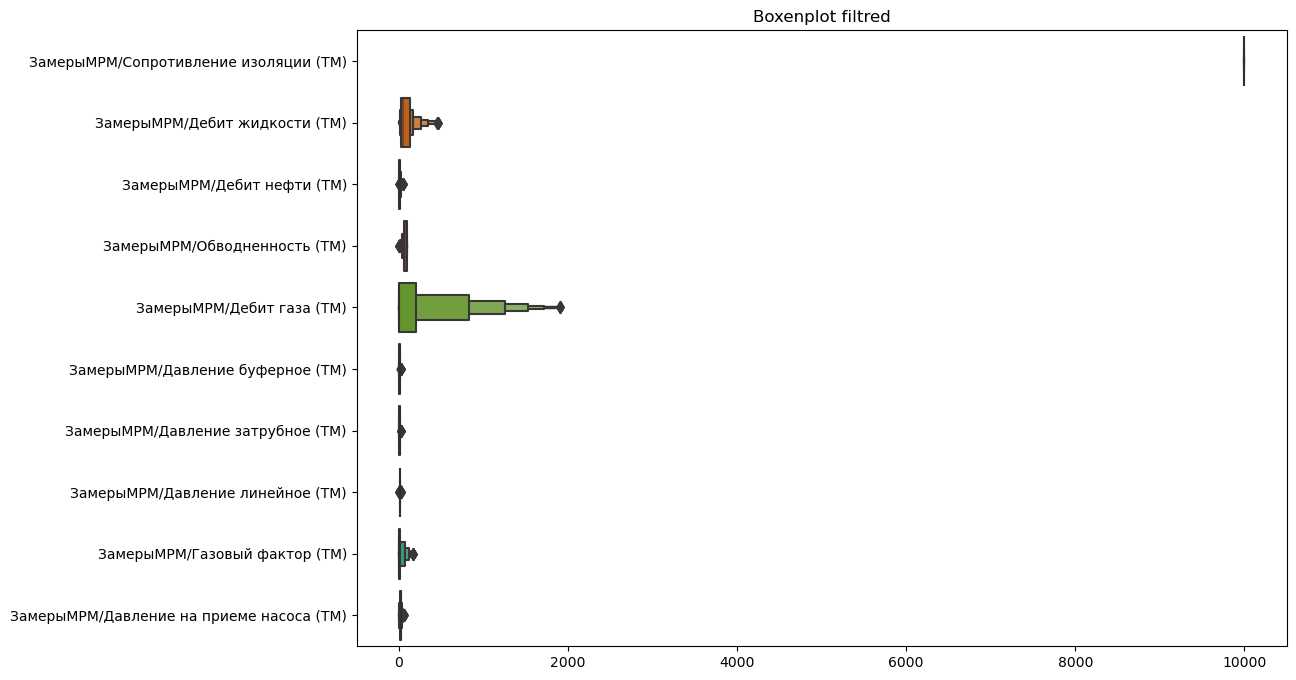

In [67]:
# Создание списка данных для boxplot'а
telemetry_up = list(series.values())

# Построение boxplot'а
plt.figure(figsize=(12, 8))
sns.boxenplot(data=tel,palette='Dark2', orient='h')
plt.title('Boxenplot filtred')
plt.savefig('boxenplot_filtred.png', dpi=500)
plt.show()

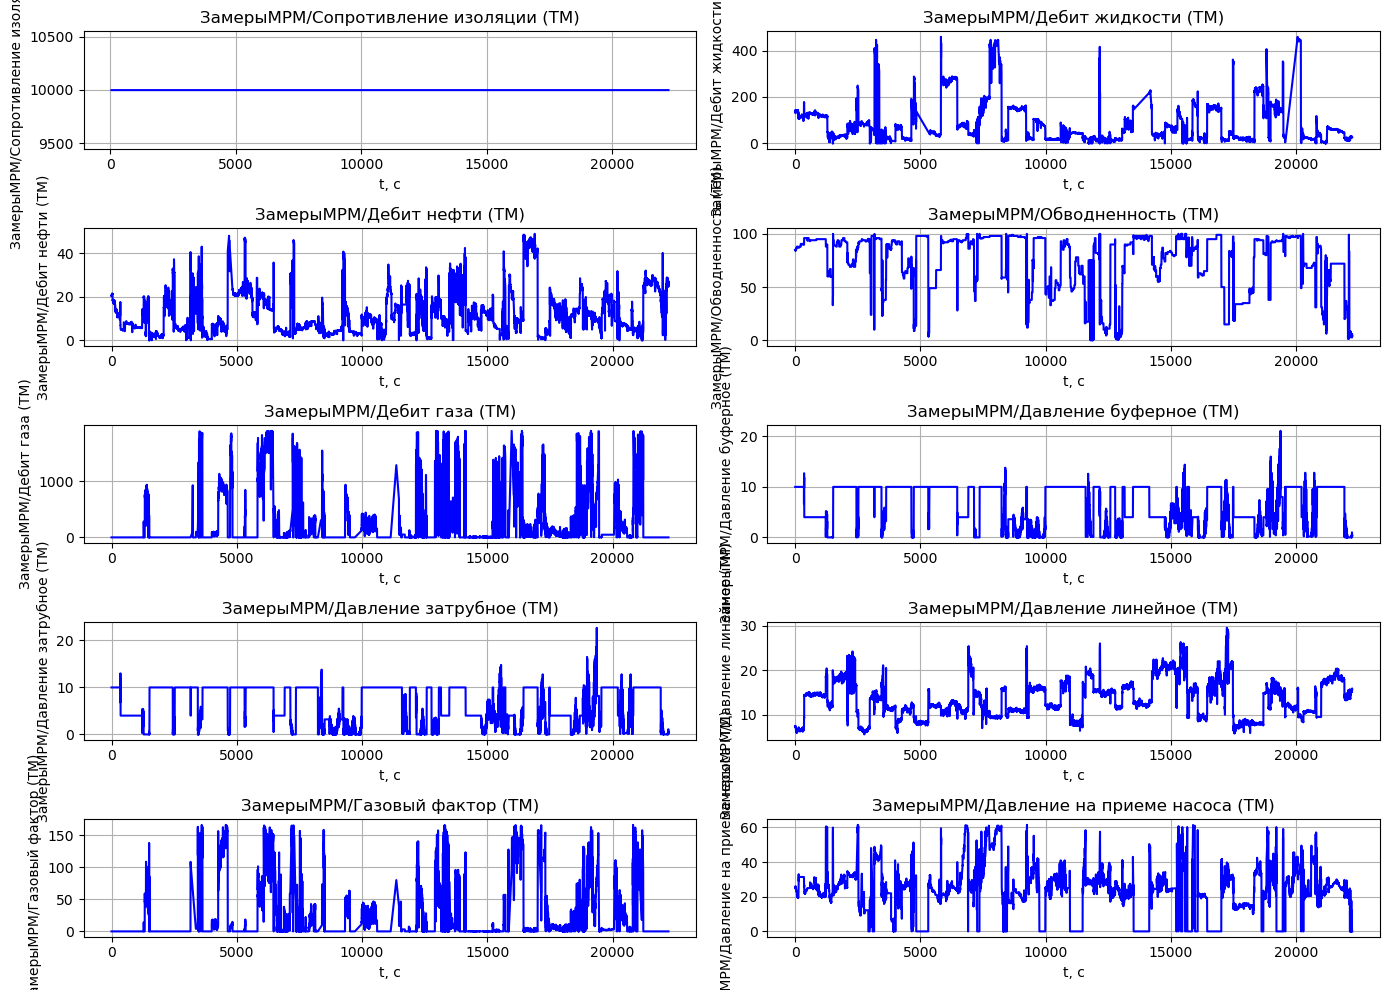

In [68]:
many_plot(tel)

In [69]:
X['ЗамерыМРМ/Сопротивление изоляции (ТМ)'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ЗамерыМРМ/Сопротивление изоляции (ТМ), dtype: float64

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22232 entries, 0 to 22231
Columns: 442 entries, ESP1_Feeding_m3_day to ЗамерыМРМ/Давление на приеме насоса (ТМ)
dtypes: float64(425), int64(17)
memory usage: 75.0 MB


In [71]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22232 entries, 0 to 22231
Series name: Failure
Non-Null Count  Dtype
--------------  -----
22232 non-null  int64
dtypes: int64(1)
memory usage: 173.8 KB


Создадим равные условия для признаков, которые учавствую в Feature Selection, посколько мы использовали Targetencoder большинство переменных для F-test и Corr были бывшими object, что снижает возможность интерпретации модели

In [72]:
X=X.fillna(0)

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Создаем экземпляр MinMaxScaler
scaler = MinMaxScaler()

# Извлекаем названия колонок
columns = X.columns

# Нормализуем данные в датафрейме X
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=columns)
X=X

In [74]:
time = data[['SK_Well','CurrentTTF', 'SK_Calendar', 'SK_Mounts', 'FailureDate', 'daysToFailure', 'daysFromLastStart', 'FailuresCountFromLastWellWork', 'SK_ConfirmDateStart', 'sk_calendarprevmonth', 'lastStartDate']].copy()
X = pd.concat([X, time], axis=1)

In [75]:
X.to_csv("train_regr.csv", index=False)

Перед тем как отбирать признаки напишем датафрейм, который содержит только телеметрию снова, исключая изоляцию

In [76]:
series.keys()

dict_keys(['ЗамерыМРМ/Сопротивление изоляции (ТМ)', 'ЗамерыМРМ/Дебит жидкости (ТМ)', 'ЗамерыМРМ/Дебит нефти (ТМ)', 'ЗамерыМРМ/Обводненность (ТМ)', 'ЗамерыМРМ/Дебит газа (ТМ)', 'ЗамерыМРМ/Давление буферное (ТМ)', 'ЗамерыМРМ/Давление затрубное (ТМ)', 'ЗамерыМРМ/Давление линейное (ТМ)', 'ЗамерыМРМ/Газовый фактор (ТМ)', 'ЗамерыМРМ/Давление на приеме насоса (ТМ)'])

In [77]:
X_telemetry=X[['ЗамерыМРМ/Дебит жидкости (ТМ)', 'ЗамерыМРМ/Дебит нефти (ТМ)', 'ЗамерыМРМ/Обводненность (ТМ)', 'ЗамерыМРМ/Дебит газа (ТМ)', 'ЗамерыМРМ/Давление буферное (ТМ)', 'ЗамерыМРМ/Давление затрубное (ТМ)', 'ЗамерыМРМ/Давление линейное (ТМ)', 'ЗамерыМРМ/Газовый фактор (ТМ)', 'ЗамерыМРМ/Давление на приеме насоса (ТМ)']]

In [81]:
X=X.fillna(0)

F-Classif

In [79]:
f_statistic, p_values = f_classif(X, y)

ValueError: could not convert string to float: '2017-11-20'

In [ ]:
selector = SelectKBest(f_classif, k=8)
X_f = selector.fit_transform(X,y)
mask = selector.get_support(indices=True)
best_features = [X.columns[i] for i in mask]
print(best_features)

['ESP1_Mark', 'ESP2_ETT', 'ESP2_Mark', 'ESP3_Mark', 'Motor1_MotorETT', 'Motor1_Mark', 'Cluster', 'SourcePumpType']


In [ ]:
data_fclassif = pd.DataFrame(X_f, columns=best_features)
data_fclassif['Failure'] = y  # добавляем столбец y в новый датасет

In [ ]:
data_fclassif.head()

,ESP1_Mark,ESP2_ETT,ESP2_Mark,ESP3_Mark,Motor1_MotorETT,Motor1_Mark,Cluster,SourcePumpType,Failure
0,0.010414,0.010414,0.010414,0.010414,0.003913,0.003913,0.002841,0.003913,0
1,0.002639,0.002685,0.002685,0.004488,0.002849,0.002849,0.002841,0.002725,0
2,0.002639,0.002685,0.002685,0.004488,0.002849,0.002849,0.002841,0.002725,0
3,0.002639,0.002685,0.002685,0.004488,0.002849,0.002849,0.002841,0.002725,0
4,0.002639,0.002685,0.002685,0.004488,0.002849,0.002849,0.002841,0.002725,0


Корреляции

In [ ]:
df=X.join(y)

In [ ]:
df.head()

,ESP1_Feeding_m3_day,ESP1_Pressure_m,ESP1_StageCount,ESP1_MaxEfficiency,ESP1_ETT,ESP1_Manufacturer,ESP1_Build_type,ESP1_EquipPropName,ESP1_Overall_group,ESP1_Diameter,...,ЗамерыМРМ/Дебит жидкости (ТМ),ЗамерыМРМ/Дебит нефти (ТМ),ЗамерыМРМ/Обводненность (ТМ),ЗамерыМРМ/Дебит газа (ТМ),ЗамерыМРМ/Давление буферное (ТМ),ЗамерыМРМ/Давление затрубное (ТМ),ЗамерыМРМ/Давление линейное (ТМ),ЗамерыМРМ/Газовый фактор (ТМ),ЗамерыМРМ/Давление на приеме насоса (ТМ),Failure
0,200.0,450.0,39.0,0.570000,0.010414,0.00271,0.005210,0.003944,0.004859,0.069,...,137.0,20.52,85.021898,0.0,10.0,10.0,7.3,0.0,25.5,0
1,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,136.0,20.34,85.044118,0.0,10.0,10.0,7.3,0.0,25.0,0
2,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,137.0,20.59,84.970803,0.0,10.0,10.0,7.5,0.0,24.8,0
3,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,137.0,20.54,85.007299,0.0,10.0,10.0,7.4,0.0,24.8,0
4,160.0,834.0,146.0,0.567058,0.002639,0.00271,0.004114,0.003944,0.003587,0.103,...,136.0,20.46,84.955882,0.0,10.0,10.0,7.3,0.0,24.8,0


In [ ]:
corr = df.corr()

In [ ]:
target_corr = corr['Failure'].sort_values(ascending=False)

if (target_corr > 0.05).all():
    print(target_corr)
else: 
    target_corr = target_corr[target_corr > 0.05]
    print(target_corr.keys())

Index(['Failure', 'Cluster', 'SourcePumpType', 'Motor1_Mark', 'ESP1_Mark',
       'ESP2_Mark', 'Motor1_MotorETT', 'ESP2_ETT', 'ESP3_Mark',
       'Separator_Mark', 'ESP1_ETT', 'ProtectorHydro_Mark', 'ESP3_ETT',
       'Cable1_Mark', 'PDT_Mark', 'GasSeparator', 'Cable1_ETT', 'ESP4_Mark',
       'Cable3_Mark', 'Cable2_Mark', 'Motor2_MotorETT',
       'Failure2_CulpritCause', 'Motor2_Mark', 'Cable4_Mark'],
      dtype='object')


In [ ]:
df_corr = df[target_corr[target_corr > 0.03].keys()]
df_corr.head()

,Failure,Cluster,SourcePumpType,Motor1_Mark,ESP1_Mark,ESP2_Mark,Motor1_MotorETT,ESP2_ETT,ESP3_Mark,Separator_Mark,...,PDT_Mark,GasSeparator,Cable1_ETT,ESP4_Mark,Cable3_Mark,Cable2_Mark,Motor2_MotorETT,Failure2_CulpritCause,Motor2_Mark,Cable4_Mark
0,0,0.002841,0.003913,0.003913,0.010414,0.010414,0.003913,0.010414,0.010414,0.013653,...,0.010038,0.003940,0.001877,0.010414,0.003913,0.002669,0.005077,0.005539,0.004402,0.001416
1,0,0.002841,0.002725,0.002849,0.002639,0.002685,0.002849,0.002685,0.004488,0.002306,...,0.002667,0.002009,0.005102,0.004480,0.005019,0.007634,0.005077,0.005539,0.004402,0.005133
2,0,0.002841,0.002725,0.002849,0.002639,0.002685,0.002849,0.002685,0.004488,0.002306,...,0.002667,0.002009,0.005102,0.004480,0.005019,0.007634,0.005077,0.005539,0.004402,0.005133
3,0,0.002841,0.002725,0.002849,0.002639,0.002685,0.002849,0.002685,0.004488,0.002306,...,0.002667,0.002009,0.005102,0.004480,0.005019,0.007634,0.005077,0.005539,0.004402,0.005133
4,0,0.002841,0.002725,0.002849,0.002639,0.002685,0.002849,0.002685,0.004488,0.002306,...,0.002667,0.002009,0.005102,0.004480,0.005019,0.007634,0.005077,0.005539,0.004402,0.005133


Mutual info 

In [82]:
from sklearn.metrics import mutual_info_score

mi_scores = []
for column in X.columns:
    mi_score = mutual_info_score(X[column], y)
    mi_scores.append((column, mi_score))

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print("Оценка взаимной информации для {} - {}".format(feature, score))

Оценка взаимной информации для daysToFailure - 0.028795724160501888
Оценка взаимной информации для MeasureMRM30 - 0.013835649592906715
Оценка взаимной информации для ЗамерыМРМ/Дебит нефти (ТМ) - 0.0135439319458361
Оценка взаимной информации для LiquidRatePot_m3_d - 0.012650173655119064
Оценка взаимной информации для WellFlowPressure_atm - 0.01263938260109982
Оценка взаимной информации для OilRatePot_t_d - 0.012546348997783199
Оценка взаимной информации для LP1_LiquidRateMER_m3_d - 0.012518019885054823
Оценка взаимной информации для SK_Calendar - 0.012124157885383041
Оценка взаимной информации для sk_calendarprevmonth - 0.012063254644614843
Оценка взаимной информации для TRTargetLfpTech - 0.011595316841313895
Оценка взаимной информации для Free_Gas - 0.011505988356145806
Оценка взаимной информации для LiquidRate_t_d - 0.011427106967175743
Оценка взаимной информации для OilRate_t_d - 0.0107002649745476
Оценка взаимной информации для MeasureMRM204 - 0.00970716178648236
Оценка взаимной инф

In [88]:
feature['OilDensity_t_m3']

TypeError: string indices must be integers, not 'str'

In [ ]:
# Выводит 8 лучших по значению взаимной информации
for feature, score in mi_scores[:8]:
    print("Оценка взаимной информации для {} - {}".format(feature, score))

Оценка взаимной информации для MeasureMRM30 - 0.013835649592906715
Оценка взаимной информации для ЗамерыМРМ/Дебит нефти (ТМ) - 0.0135439319458361
Оценка взаимной информации для LiquidRatePot_m3_d - 0.012650173655119064
Оценка взаимной информации для WellFlowPressure_atm - 0.01263938260109982
Оценка взаимной информации для OilRatePot_t_d - 0.012546348997783199
Оценка взаимной информации для LP1_LiquidRateMER_m3_d - 0.012518019885054823
Оценка взаимной информации для TRTargetLfpTech - 0.011595316841313895
Оценка взаимной информации для Free_Gas - 0.011505988356145806


In [ ]:
# Получаем названия признаков с наивысшими значениями оценки взаимной информации
top_features = [x[0] for x in mi_scores[:8]]
top_features

['MeasureMRM30',
 'ЗамерыМРМ/Дебит нефти (ТМ)',
 'LiquidRatePot_m3_d',
 'WellFlowPressure_atm',
 'OilRatePot_t_d',
 'LP1_LiquidRateMER_m3_d',
 'TRTargetLfpTech',
 'Free_Gas']

In [ ]:
df_mutual = X[['LiquidRatePot_m3_d',
 'WellFlowPressure_atm',
 'OilRatePot_t_d',
 'LP1_LiquidRateMER_m3_d',
 'TRTargetLfpTech',
 'Free_Gas','ЗамерыМРМ/Дебит жидкости (ТМ)', 'ЗамерыМРМ/Дебит нефти (ТМ)', 'ЗамерыМРМ/Обводненность (ТМ)', 'ЗамерыМРМ/Дебит газа (ТМ)', 'ЗамерыМРМ/Давление буферное (ТМ)', 'ЗамерыМРМ/Давление затрубное (ТМ)', 'ЗамерыМРМ/Давление линейное (ТМ)', 'ЗамерыМРМ/Газовый фактор (ТМ)', 'ЗамерыМРМ/Давление на приеме насоса (ТМ)']].copy()
df_mutual['Failure'] = y.copy()

In [ ]:
df_mutual.head()

,LiquidRatePot_m3_d,WellFlowPressure_atm,OilRatePot_t_d,LP1_LiquidRateMER_m3_d,TRTargetLfpTech,Free_Gas,ЗамерыМРМ/Дебит жидкости (ТМ),ЗамерыМРМ/Дебит нефти (ТМ),ЗамерыМРМ/Обводненность (ТМ),ЗамерыМРМ/Дебит газа (ТМ),ЗамерыМРМ/Давление буферное (ТМ),ЗамерыМРМ/Давление затрубное (ТМ),ЗамерыМРМ/Давление линейное (ТМ),ЗамерыМРМ/Газовый фактор (ТМ),ЗамерыМРМ/Давление на приеме насоса (ТМ),Failure
0,200.887102,96.990352,24.226985,130.118667,36.33,3.497414,137.0,20.52,85.021898,0.0,10.0,10.0,7.3,0.0,25.5,0
1,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,136.0,20.34,85.044118,0.0,10.0,10.0,7.3,0.0,25.0,0
2,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,137.0,20.59,84.970803,0.0,10.0,10.0,7.5,0.0,24.8,0
3,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,137.0,20.54,85.007299,0.0,10.0,10.0,7.4,0.0,24.8,0
4,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,136.0,20.46,84.955882,0.0,10.0,10.0,7.3,0.0,24.8,0


In [ ]:
df_mutual = df_mutual.rename(columns={'TRTargetLfpTech': 'Целевое забойное давление',
                                         'Free_Gas': 'Свободный газ на входе при подаче Q опт, %',
                                         'LP1_LiquidRateMER_m3_d': 'Пласт1/Добыча жидкости м3/сут',
                                         'OilRatePot_t_d': 'Потенциальный дебит нефти, т/сут',
                                         'WellFlowPressure_atm': 'Забойное давление',
                                         'LiquidRatePot_m3_d': 'Потенциальный дебит жидкости, м3/сут'})

In [ ]:
df_mutual.head()

,"Потенциальный дебит жидкости, м3/сут",Забойное давление,"Потенциальный дебит нефти, т/сут",Пласт1/Добыча жидкости м3/сут,Целевое забойное давление,"Свободный газ на входе при подаче Q опт, %",ЗамерыМРМ/Дебит жидкости (ТМ),ЗамерыМРМ/Дебит нефти (ТМ),ЗамерыМРМ/Обводненность (ТМ),ЗамерыМРМ/Дебит газа (ТМ),ЗамерыМРМ/Давление буферное (ТМ),ЗамерыМРМ/Давление затрубное (ТМ),ЗамерыМРМ/Давление линейное (ТМ),ЗамерыМРМ/Газовый фактор (ТМ),ЗамерыМРМ/Давление на приеме насоса (ТМ),Failure
0,200.887102,96.990352,24.226985,130.118667,36.33,3.497414,137.0,20.52,85.021898,0.0,10.0,10.0,7.3,0.0,25.5,0
1,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,136.0,20.34,85.044118,0.0,10.0,10.0,7.3,0.0,25.0,0
2,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,137.0,20.59,84.970803,0.0,10.0,10.0,7.5,0.0,24.8,0
3,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,137.0,20.54,85.007299,0.0,10.0,10.0,7.4,0.0,24.8,0
4,222.101207,116.316656,26.785406,137.359839,37.43,3.497414,136.0,20.46,84.955882,0.0,10.0,10.0,7.3,0.0,24.8,0


In [ ]:
df_mutual.to_csv('train_mutual_info.csv', index=False)

Вывод:
Для отбора признаков использовалось 3 метода, самым адекватным с точки зрения будущей интерпретации является mutual info. Наличие/отсутствие MinMaxScaler никак не повлияло на дальнейший отбор признаков

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('train_mutual_info.csv')

In [ ]:
data.columns

Index(['Потенциальный дебит жидкости, м3/сут', 'Забойное давление',
       'Потенциальный дебит нефти, т/сут', 'Пласт1/Добыча жидкости м3/сут',
       'Целевое забойное давление',
       'Свободный газ на входе при подаче Q опт, %',
       'ЗамерыМРМ/Дебит жидкости (ТМ)', 'ЗамерыМРМ/Дебит нефти (ТМ)',
       'ЗамерыМРМ/Обводненность (ТМ)', 'ЗамерыМРМ/Дебит газа (ТМ)',
       'ЗамерыМРМ/Давление буферное (ТМ)', 'ЗамерыМРМ/Давление затрубное (ТМ)',
       'ЗамерыМРМ/Давление линейное (ТМ)', 'ЗамерыМРМ/Газовый фактор (ТМ)',
       'ЗамерыМРМ/Давление на приеме насоса (ТМ)', 'Failure'],
      dtype='object')